<a href="https://colab.research.google.com/github/erobrien6/OBrien_DSPN_S23/blob/main/Exercise11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The Beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [47]:
# INSERT CODE HERE
#install.packages("class")
#install.packages("tidyverse")
#install.packages("ggplot2")

library(class)
library(tidyverse)
library(ggplot2)

df_gem <- diamonds

mean(df_gem$price) #3932.8

df_gem <- df_gem %>%
  mutate(price_bin = as.factor(ifelse(price > 3932.8, 1, 0)))

df_gem <- df_gem %>%
  select(c(1, 5:6, 8:9, 11))

# Print first few lines
head(df_gem)

# Print dimensions
dim(df_gem)
## 53940 x 6
  

[1] 3932.8

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price. 

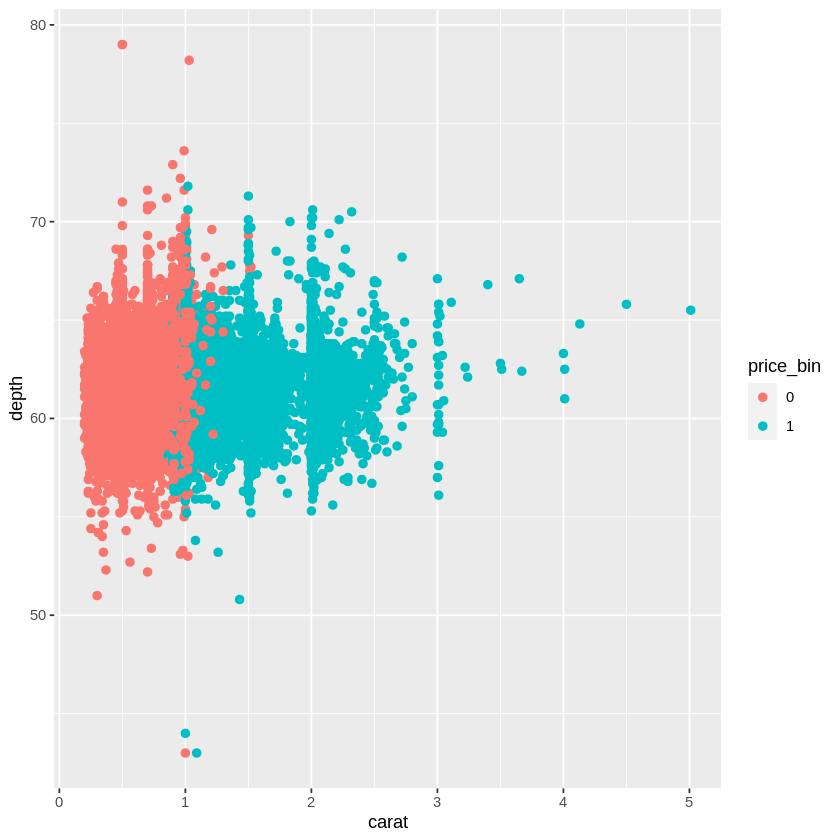

In [ ]:
# INSERT CODE HERE

ggplot(df_gem,aes(x=carat,y=depth,col=price_bin)) +
  geom_point(size=2)


Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> * *I think kNN may have trouble distinguishing price class of diamonds based on these two variables alone because there seems to be a decent amount of overlap between some stones below and above the mean price. Because many of the data points from separate groups are in proximity to each other, kNN may not be able to categorize them correctly. However, I think kNN will perform well for categorizing diamonds closer to 0 carats (for below mean price) and above 1.5 carats (for above mean price) because there is not much overlap at the extreme ends of the carat variable.
* The carat variable gives the most information about classification, as almost all of the diamonds that are 1 or more carats cost more than the mean price. However, stones both below and above the mean price of the dataframe have relatively similar spreads across the depth variable.*
>
>


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [15]:
set.seed(2023)

# INSERT CODE HERE
#53940*0.3 # 16182 cases = 30%

#Training data - "not test" rows
test <- sample(1:nrow(df_gem),16182)
df_test <- df_gem[test ,]
df_train <- df_gem[-test ,]

head(df_test)
head(df_train)

# TRUE/FALSE indicator for whether each observation is a test item or not 
df_gem$is.test <- 1:nrow(df_gem) %in% test 

dim(df_test)
dim(df_train)


carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
1.22,62.3,56.0,6.81,6.84,1,TRUE
1.57,62.3,56.0,7.48,7.41,1,TRUE
1.11,62.4,57.7,6.57,6.64,1,TRUE
0.42,60.6,57.0,4.82,4.85,0,TRUE
0.32,62.6,55.0,4.39,4.36,0,TRUE
0.90,62.7,58.0,6.06,6.15,1,TRUE


carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE
0.23,56.9,65,4.05,4.07,0,FALSE
0.29,62.4,58,4.20,4.23,0,FALSE
0.31,63.3,58,4.34,4.35,0,FALSE
0.24,62.8,57,3.94,3.96,0,FALSE
0.24,62.3,57,3.95,3.98,0,FALSE


[1] 16182     7

[1] 37758     7

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`. 

*Hint: Review the format required for the arguments of knn()*

In [3]:
set.seed(2023)

train.preds <- cbind(df_gem$carat[-test], df_gem$depth[-test])
train.spec <- df_gem$price_bin[-test]

test.preds <- cbind(df_gem$carat[test], df_gem$depth[test])

#kNN
test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)



Now, output a confusion matrix and calculate the test error to evaluate model performance. 

In [16]:
# INSERT CODE HERE
confusion_df <- data.frame(predicted = test.spec.knn,actual = df_gem$price_bin[test])
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

# Test Error
error <- (1 - (mean(confusion_df$predicted == confusion_df$actual)))
print(error)

         actual
predicted    0    1
        0 9707  316
        1  539 5620

[1] "---"
[1] "Accuracy: 0.947163515016685"
[1] 0.05283648


How did your model perform?
> * The model actually did very well in classifying diamonds with prices below and above the mean price. The overall accuracy was 0.947; 539 cases were assigned to be above the mean price when they were actually below, and 316 cases were assigned to be below the mean price when they were actually above, but the majority were correctly categorized. 
>
>


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [17]:
set.seed(2023)

train.preds2 <- cbind(df_gem$carat[-test], df_gem$depth[-test], df_gem$table[-test],
df_gem$x[-test], df_gem$y[-test])
train.spec2 <- df_gem$price_bin[-test]

test.preds2 <- cbind(df_gem$carat[test], df_gem$depth[test], df_gem$table[test],
df_gem$x[test], df_gem$y[test])

#kNN
test.spec.knn2 <- knn(train.preds2, test.preds2, train.spec2, k = 3)

confusion_df2 <- data.frame(predicted = test.spec.knn2,actual2 = df_gem$price_bin[test])
table(confusion_df2)
print("---")
print(paste("Accuracy:",mean(confusion_df2$predicted == confusion_df2$actual2)))

# Test Error
error2 <- (1 - (mean(confusion_df2$predicted == confusion_df2$actual)))
print(error2)



         actual2
predicted    0    1
        0 9728  391
        1  518 5545

[1] "---"
[1] "Accuracy: 0.943826473859844"
[1] 0.05617353


Did your model predictions improve?
> * The model fit performed relatively the same, with a slightly higher error rate at 0.056. Including the extra variables did not significantly improve performance.


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy. 

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`. 

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

In [37]:
for (i in seq(1:30)) {
    knn_fits <- knn(train.preds, test.preds, train.spec, k = i)
    
    #overall error
    conf_df  <- data.frame(predicted = knn_fits, actual = df_gem$price_bin[test])
    output$error[i]  <- (mean(conf_df$predicted != conf_df$actual))
}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05401063
2,2,0.05394883
3,3,0.05308367
4,4,0.05289828
5,5,0.05302188
6,6,0.05252750


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


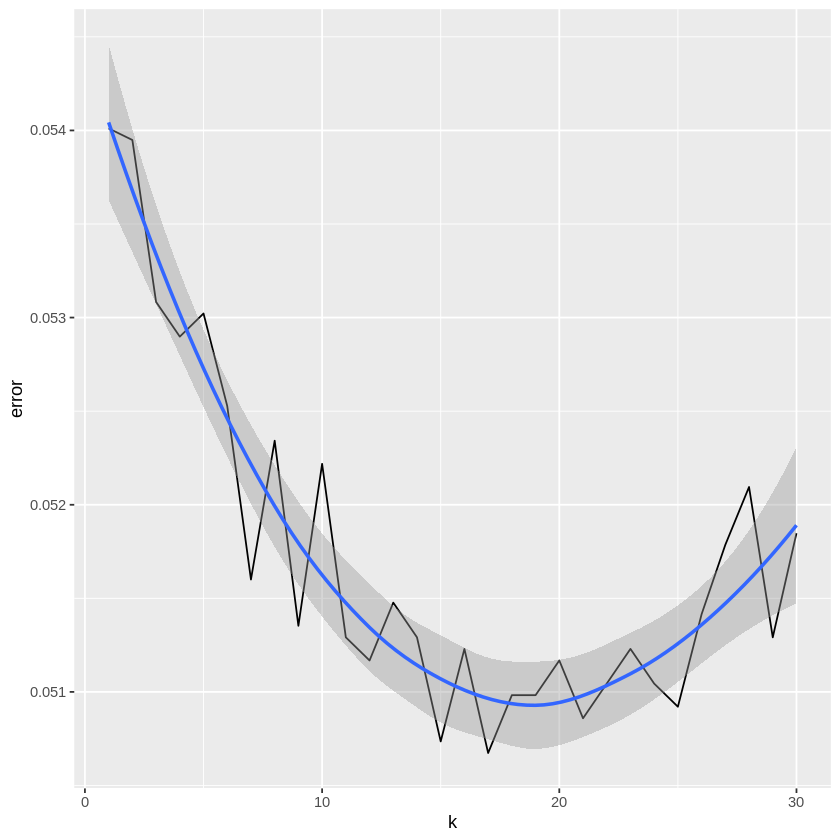

In [45]:
# GGplot
ggplot(data=output, aes(x=k, y=error)) + 
  geom_line() +
    geom_smooth()


Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * I think the best value of k to minimize error would be around k=16 to 18. This would reduce the test error from about 0.054 to 0.051 (only a slight amount).


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [57]:
#install.packages("ISLR")
library(ISLR)

set.seed(2023)

# Create standardized vars
  # carat variable is 1, depth is 2
df_gem$z_carat <- scale(df_gem$carat)
df_gem$z_depth <- scale(df_gem$depth)

# Test v. Train set
test_scale <- sample(1:nrow(df_gem),16182)
df_test_z <- df_gem[test_scale ,]
df_train_z <- df_gem[-test_scale ,]

# kNN
train_z <- cbind(df_gem$z_carat[-test_scale], df_gem$z_depth[-test_scale])
train_spec_z <- df_gem$price_bin[-test_scale]

test_preds_z <- cbind(df_gem$z_carat[test_scale], df_gem$z_depth[test_scale])

#kNN
test.spec.knn3 <- knn(train_z, test_preds_z, train_spec_z, k = 17)

confusion_df3 <- data.frame(predicted = test.spec.knn3,actual3 = df_gem$price_bin[test_scale])
table(confusion_df3)
print("---")
print(paste("Accuracy:",mean(confusion_df3$predicted == confusion_df3$actual3)))

# Test Error
error3 <- (1 - (mean(confusion_df3$predicted == confusion_df3$actual3)))
print(error3)



         actual3
predicted    0    1
        0 9708  275
        1  538 5661

[1] "---"
[1] "Accuracy: 0.949758991472006"
[1] 0.05024101


What impact did rescaling the data have on your error rate?
> * Rescaling the data made the model accuracy slightly higher (0.95) and the error rate slightly lower (0.050). Yay!


**DUE:** 5pm March 22, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
